In [1]:
import os
os.chdir("../")

In [19]:
import cv2
import json
import matplotlib.pyplot as plt

In [20]:

%load_ext autoreload

%autoreload 2

os.getcwd()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


'/home/honza/Documents/UniHack/fast-form'

<IPython.core.display.Javascript object>


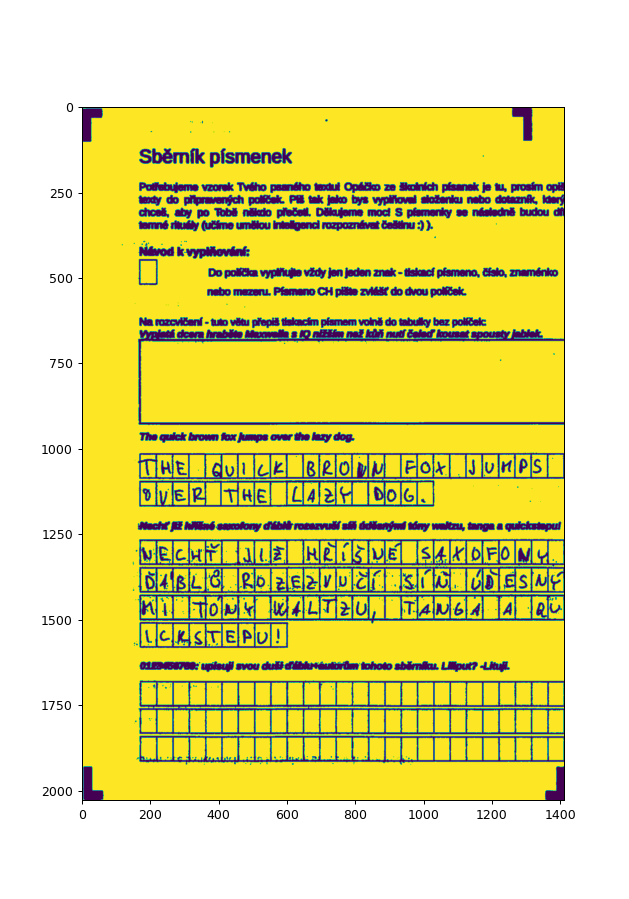

In [24]:
from structure_parser.formstructureparser import FormStructureParser

from preprocessing.preprocess import preprocess
from IPython.display import Image
import PIL.Image
import matplotlib

image_path = "test/example_forms/uceni/scan-h2.png"
with open("test/example_forms/uceni/config.json", 'r') as f:
    config = json.load(f) 


im = cv2.imread(image_path)
img = preprocess(im, config, show_borders=True)

plt.imshow(img)
plt.show()

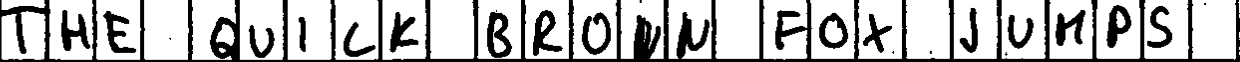

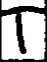

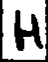

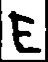

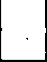

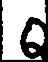

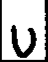

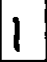

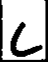

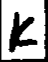

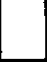

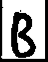

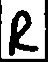

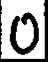

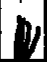

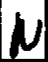

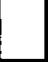

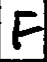

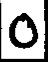

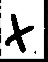

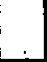

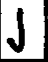

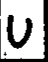

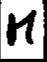

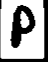

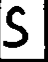

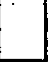

In [29]:
image_path = "test/example_forms/uceni/scan-h2.png"
with open("test/example_forms/uceni/config.json", 'r') as f:
    config = json.load(f) 


im = cv2.imread(image_path)
img = preprocess(im, config, show_borders=True)

fsp = FormStructureParser(config)
form_data = fsp.process_form(img)


for field in form_data["fields"]:
    display(PIL.Image.fromarray(field["img"]))
    for img in field["box_data"]:
        if len(img)>0:
            display(PIL.Image.fromarray(img))